In [1]:
import os
import glob
import pandas as pd
import pyedflib
from matplotlib import pyplot as plt

In [2]:
data_dir = "/Users/tereza/spring_2025/STAT_4830/STAT-4830-GOALZ-project/data/ANPHY-Sleep_data"

# all subject folders named "EPCTL*"
subject_dirs = sorted([
    d for d in os.listdir(data_dir)
    if d.lower().startswith("epctl") and os.path.isdir(os.path.join(data_dir, d))
])

In [3]:
N1_counts = []
W_counts = []

for subject in subject_dirs:
    subject_path = os.path.join(data_dir, subject)
    
    # Find CSV and EDF files
    csv_files = glob.glob(os.path.join(subject_path, "*.csv"))
    edf_files = glob.glob(os.path.join(subject_path, "*.edf"))
    
    if not csv_files or not edf_files:
        print(f"Skipping {subject}: missing CSV or EDF file.")
        continue
    
    csv_file = csv_files[0]
    edf_file = edf_files[0]
    
    # Load CSV (stage labels)
    df = pd.read_csv(csv_file, index_col=0)
    stage_counts = df["stage"].value_counts()
    
    # Print stage counts
    print(f"\nSubject: {subject}")
    print("Stage counts:")
    for stage_label, count in stage_counts.items():
        print(f"  {stage_label}: {count}")
    
    # Total rows
    total_rows = len(df)
    print(f"Total rows in CSV: {total_rows}")
    
    # Last time_index in hours
    last_time_index_sec = df["time_index"].iloc[-1]
    duration_hours = last_time_index_sec / 3600
    print(f"Total duration: {duration_hours:.2f} hours")
    
    # Add to lists for averaging
    # If a stage does not exist, use .get(..., 0) to default to 0
    N1_counts.append(stage_counts.get("N1", 0))
    W_counts.append(stage_counts.get("W", 0))
    
    # reader = pyedflib.EdfReader(edf_file)
    # num_signals = reader.signals_in_file
    # reader.close()
    # print(f"Loaded EDF with {num_signals} signals.")

# Compute average counts for N1 and W across all subjects processed
num_subjects = len(N1_counts)  # or the number of subjects actually processed
if num_subjects > 0:
    avg_n1 = sum(N1_counts) / num_subjects
    avg_w  = sum(W_counts)  / num_subjects
    print(f"\nAverage N1 labels across all subjects: {avg_n1:.2f}")
    print(f"Average W labels across all subjects:  {avg_w:.2f}")
else:
    print("\nNo subjects processed.")


Subject: EPCTL01
Stage counts:
  N2: 471
  N3: 185
  R: 176
  N1: 74
  W: 46
  L: 6
Total rows in CSV: 958
Total duration: 7.97 hours

Subject: EPCTL02
Stage counts:
  N2: 492
  W: 195
  N3: 176
  N1: 84
  R: 70
  L: 56
Total rows in CSV: 1073
Total duration: 8.93 hours

Subject: EPCTL03
Stage counts:
  N2: 305
  N3: 207
  R: 127
  L: 82
  N1: 66
  W: 56
Total rows in CSV: 843
Total duration: 7.02 hours

Subject: EPCTL04
Stage counts:
  W: 228
  N2: 214
  N3: 124
  N1: 95
  R: 74
  L: 28
Total rows in CSV: 763
Total duration: 6.35 hours

Subject: EPCTL05
Stage counts:
  N2: 309
  N3: 170
  R: 132
  N1: 71
  W: 47
  L: 27
Total rows in CSV: 756
Total duration: 6.29 hours

Subject: EPCTL06
Stage counts:
  N2: 374
  N3: 154
  W: 147
  R: 134
  N1: 77
  L: 33
Total rows in CSV: 919
Total duration: 7.65 hours

Subject: EPCTL07
Stage counts:
  N2: 397
  N3: 181
  W: 113
  R: 104
  N1: 96
  L: 89
Total rows in CSV: 980
Total duration: 8.16 hours

Subject: EPCTL08
Stage counts:
  N2: 334
  N3

In [4]:
n1_runs_list = []       # number of N1 runs per subject
n1_avg_blocks_list = [] # average run length (in blocks) for N1 per subject
w_runs_list = []        # number of W runs per subject
w_avg_blocks_list = []  # average run length (in blocks) for W per subject

def get_run_info(stages, target_label):
    """
    Given a sequence of stage labels (e.g. from the "stage" column), 
    returns:
      num_runs    - the number of discontinuous runs of target_label
      avg_run_len - the average length (in blocks/rows) of these runs
    """
    runs = []
    current_run = 0
    for stage in stages:
        if stage == target_label:
            current_run += 1
        else:
            if current_run > 0:
                runs.append(current_run)
                current_run = 0
    # If the file ends with target_label, add the final run
    if current_run > 0:
        runs.append(current_run)
        
    num_runs = len(runs)
    avg_run_len = sum(runs) / num_runs if num_runs > 0 else 0
    return num_runs, avg_run_len

# Process each subject folder
for subject in subject_dirs:
    subject_path = os.path.join(data_dir, subject)
    
    # Look for the CSV and EDF files
    csv_files = glob.glob(os.path.join(subject_path, "*.csv"))
    edf_files = glob.glob(os.path.join(subject_path, "*.edf"))
    
    if not csv_files or not edf_files:
        print(f"Skipping {subject}: missing CSV or EDF file.")
        continue
    
    csv_file = csv_files[0]
    edf_file = edf_files[0]
    
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file, index_col=0)
    
    # Get run information for N1 and W
    n1_num_runs, n1_avg_len_blocks = get_run_info(df["stage"], "N1")
    w_num_runs, w_avg_len_blocks = get_run_info(df["stage"], "W")
    
    # Accumulate values for overall averages
    n1_runs_list.append(n1_num_runs)
    n1_avg_blocks_list.append(n1_avg_len_blocks)
    w_runs_list.append(w_num_runs)
    w_avg_blocks_list.append(w_avg_len_blocks)
    
    total_rows = len(df)
    last_time_index_sec = df["time_index"].iloc[-1]
    duration_hours = last_time_index_sec / 3600  # convert seconds to hours
    
    print(f"\nSubject: {subject}")
    print(f"  N1 runs: {n1_num_runs}, average run length = {n1_avg_len_blocks:.2f} blocks ({n1_avg_len_blocks*30:.2f} s)")
    print(f"  W runs:  {w_num_runs}, average run length = {w_avg_len_blocks:.2f} blocks ({w_avg_len_blocks*30:.2f} s)")
    print(f"  Total rows in CSV: {total_rows}, Total duration: {duration_hours:.2f} hours")
    
    # reader = pyedflib.EdfReader(edf_file)
    # num_signals = reader.signals_in_file
    # reader.close()
    # print(f"  Loaded EDF with {num_signals} electrode signals.")

if n1_runs_list:
    avg_n1_runs = sum(n1_runs_list) / len(n1_runs_list)
    avg_n1_avg_blocks = sum(n1_avg_blocks_list) / len(n1_avg_blocks_list)
    avg_w_runs = sum(w_runs_list) / len(w_runs_list)
    avg_w_avg_blocks = sum(w_avg_blocks_list) / len(w_avg_blocks_list)
    
    print("\nOverall averages across subjects:")
    print(f"  Average N1 runs: {avg_n1_runs:.2f}")
    print(f"  Average N1 run length: {avg_n1_avg_blocks:.2f} rows ({avg_n1_avg_blocks*30:.2f} s)")
    print(f"  Average W runs:  {avg_w_runs:.2f}")
    print(f"  Average W run length: {avg_w_avg_blocks:.2f} rows ({avg_w_avg_blocks*30:.2f} s)")
else:
    print("\nNo subjects processed.")



Subject: EPCTL01
  N1 runs: 30, average run length = 2.47 blocks (74.00 s)
  W runs:  15, average run length = 3.07 blocks (92.00 s)
  Total rows in CSV: 958, Total duration: 7.97 hours

Subject: EPCTL02
  N1 runs: 31, average run length = 2.71 blocks (81.29 s)
  W runs:  21, average run length = 9.29 blocks (278.57 s)
  Total rows in CSV: 1073, Total duration: 8.93 hours

Subject: EPCTL03
  N1 runs: 31, average run length = 2.13 blocks (63.87 s)
  W runs:  18, average run length = 3.11 blocks (93.33 s)
  Total rows in CSV: 843, Total duration: 7.02 hours

Subject: EPCTL04
  N1 runs: 41, average run length = 2.32 blocks (69.51 s)
  W runs:  19, average run length = 12.00 blocks (360.00 s)
  Total rows in CSV: 763, Total duration: 6.35 hours

Subject: EPCTL05
  N1 runs: 22, average run length = 3.23 blocks (96.82 s)
  W runs:  12, average run length = 3.92 blocks (117.50 s)
  Total rows in CSV: 756, Total duration: 6.29 hours

Subject: EPCTL06
  N1 runs: 27, average run length = 2.85 b

In [5]:
# Gather all subject folders starting with "EPCTL"
subject_dirs = sorted([
    d for d in os.listdir(data_dir)
    if d.lower().startswith("epctl") and os.path.isdir(os.path.join(data_dir, d))
])

def get_run_info(stages, target_label, min_blocks=None):
    """
    Given a sequence of stage labels, compute:
      - num_runs: the number of discontinuous runs (consecutive blocks) of target_label.
      - avg_run_len: the average run length (in blocks).
    If min_blocks is provided, also return:
      - num_long_runs: count of runs that are at least min_blocks long.
    """
    runs = []
    current_run = 0
    for stage in stages:
        if stage == target_label:
            current_run += 1
        else:
            if current_run > 0:
                runs.append(current_run)
                current_run = 0
    if current_run > 0:
        runs.append(current_run)
    
    num_runs = len(runs)
    avg_run_len = sum(runs)/num_runs if num_runs > 0 else 0
    if min_blocks is not None:
        num_long_runs = sum(1 for run in runs if run >= min_blocks)
        return num_runs, avg_run_len, num_long_runs
    return num_runs, avg_run_len

# We'll accumulate metrics for each stage label across subjects
overall_metrics = {}
subject_count = {}  # how many subjects had that label
min_blocks = 10  # threshold for long run: 5 minutes = 5*60/30 = 10 blocks

for subject in subject_dirs:
    subject_path = os.path.join(data_dir, subject)
    csv_files = glob.glob(os.path.join(subject_path, "*.csv"))
    if not csv_files:
        print(f"Skipping {subject}: no CSV file found.")
        continue
    csv_file = csv_files[0]
    df = pd.read_csv(csv_file, index_col=0)
    
    total_rows = len(df)
    last_time_index_sec = df["time_index"].iloc[-1]
    duration_hours = last_time_index_sec / 3600  # convert seconds to hours
    print(f"\nSubject: {subject}")
    print(f"  Total rows: {total_rows}, Total duration: {duration_hours:.2f} hours")
    
    # Process each unique stage label in this subject
    labels_present = df["stage"].unique()
    print("  Stage metrics:")
    for label in labels_present:
        num_runs, avg_run_len, num_long_runs = get_run_info(df["stage"], label, min_blocks=min_blocks)
        print(f"    {label}: {num_runs} runs, avg run length = {avg_run_len:.2f} blocks ({avg_run_len*30:.2f} s), long runs (>=5 min) = {num_long_runs}")
        
        if label not in overall_metrics:
            overall_metrics[label] = {"num_runs": [], "avg_run_len": [], "num_long_runs": []}
            subject_count[label] = 0
        overall_metrics[label]["num_runs"].append(num_runs)
        overall_metrics[label]["avg_run_len"].append(avg_run_len)
        overall_metrics[label]["num_long_runs"].append(num_long_runs)
        subject_count[label] += 1

# Compute and print overall averages across subjects for each stage label
print("\nOverall averages across subjects for each stage:")
for label, metrics in overall_metrics.items():
    avg_num_runs = sum(metrics["num_runs"]) / subject_count[label]
    avg_avg_run_len = sum(metrics["avg_run_len"]) / subject_count[label]
    avg_num_long_runs = sum(metrics["num_long_runs"]) / subject_count[label]
    print(f"  {label}:")
    print(f"    Avg runs: {avg_num_runs:.2f}")
    print(f"    Avg run length: {avg_avg_run_len:.2f} blocks ({avg_avg_run_len*30:.2f} s)")
    print(f"    Avg long runs (>=5 min): {avg_num_long_runs:.2f}")


Subject: EPCTL01
  Total rows: 958, Total duration: 7.97 hours
  Stage metrics:
    W: 15 runs, avg run length = 3.07 blocks (92.00 s), long runs (>=5 min) = 1
    N1: 30 runs, avg run length = 2.47 blocks (74.00 s), long runs (>=5 min) = 0
    N2: 41 runs, avg run length = 11.49 blocks (344.63 s), long runs (>=5 min) = 17
    N3: 21 runs, avg run length = 8.81 blocks (264.29 s), long runs (>=5 min) = 5
    R: 10 runs, avg run length = 17.60 blocks (528.00 s), long runs (>=5 min) = 8
    L: 1 runs, avg run length = 6.00 blocks (180.00 s), long runs (>=5 min) = 0

Subject: EPCTL02
  Total rows: 1073, Total duration: 8.93 hours
  Stage metrics:
    L: 2 runs, avg run length = 28.00 blocks (840.00 s), long runs (>=5 min) = 2
    W: 21 runs, avg run length = 9.29 blocks (278.57 s), long runs (>=5 min) = 5
    N1: 31 runs, avg run length = 2.71 blocks (81.29 s), long runs (>=5 min) = 0
    N2: 32 runs, avg run length = 15.38 blocks (461.25 s), long runs (>=5 min) = 17
    N3: 7 runs, avg r

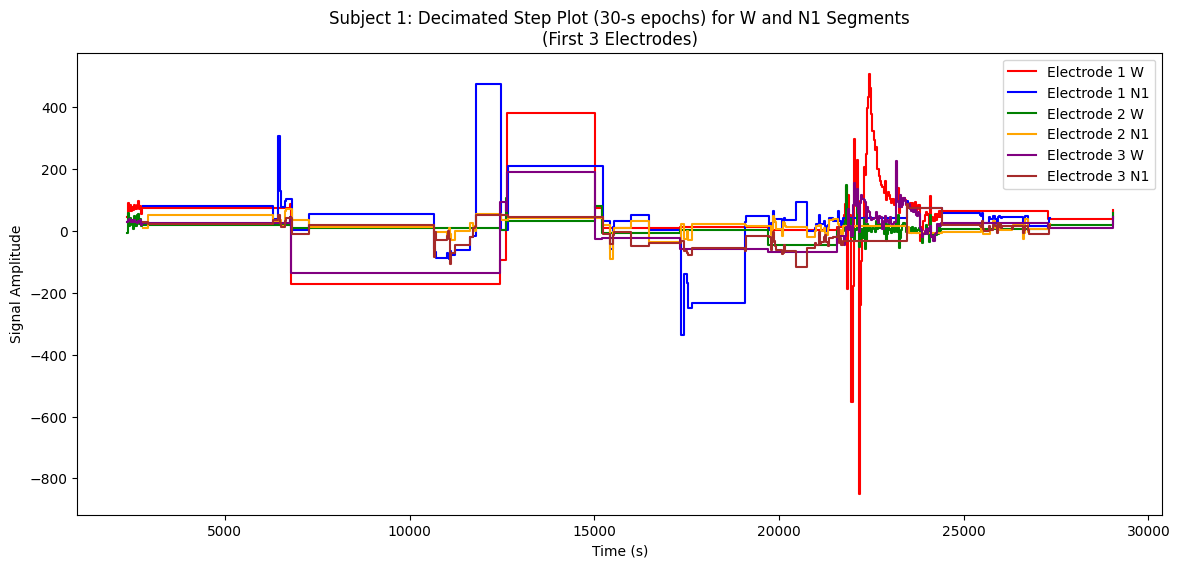

In [8]:
# subject1 = [d for d in os.listdir(data_dir) if d.lower().startswith("epctl") and os.path.isdir(os.path.join(data_dir, d))][0]
# subject_path = os.path.join(data_dir, subject1)

# # Get CSV and EDF file for subject 1
# csv_files = glob.glob(os.path.join(subject_path, "*.csv"))
# edf_files = glob.glob(os.path.join(subject_path, "*.edf"))
# if not csv_files or not edf_files:
#     print("Missing CSV or EDF file for subject 1")
# else:
#     csv_file = csv_files[0]
#     edf_file = edf_files[0]
    
#     # Load annotation CSV (one row per 30-second epoch)
#     df = pd.read_csv(csv_file, index_col=0)
#     # Filter to keep only epochs with stage "W" or "N1"
#     df_valid = df[df["stage"].isin(["W", "N1"])].copy()
    
#     # Load the EDF signals for the first 3 electrodes
#     reader = pyedflib.EdfReader(edf_file)
#     fs = reader.getSampleFrequency(0)  # 1000 Hz
#     signals = [reader.readSignal(ch) for ch in range(3)]
#     reader.close()
    
#     color_map = {
#         (0, "W"): "red",
#         (0, "N1"): "blue",
#         (1, "W"): "green",
#         (1, "N1"): "orange",
#         (2, "W"): "purple",
#         (2, "N1"): "brown"
#     }
    
#     plt.figure(figsize=(14, 6))
    
#     for i in range(3):
#         for stage in ["W", "N1"]:
#             # Get times for the current stage (in seconds)
#             times = df_valid.loc[df_valid["stage"] == stage, "time_index"].values
#             # Convert epoch times to sample indices (using fs)
#             idx = (times * fs).astype(int)
#             # Decimated signal for this electrode and stage
#             decimated_signal = signals[i][idx]
#             plt.step(times, decimated_signal, where='post',
#                      color=color_map[(i, stage)],
#                      label=f'Electrode {i+1} {stage}')
    
#     plt.xlabel("Time (s)")
#     plt.ylabel("Signal Amplitude")
#     plt.title("Subject 1: Decimated Step Plot (30-s epochs) for W and N1 Segments\n(First 3 Electrodes)")
#     plt.legend()
#     plt.show()

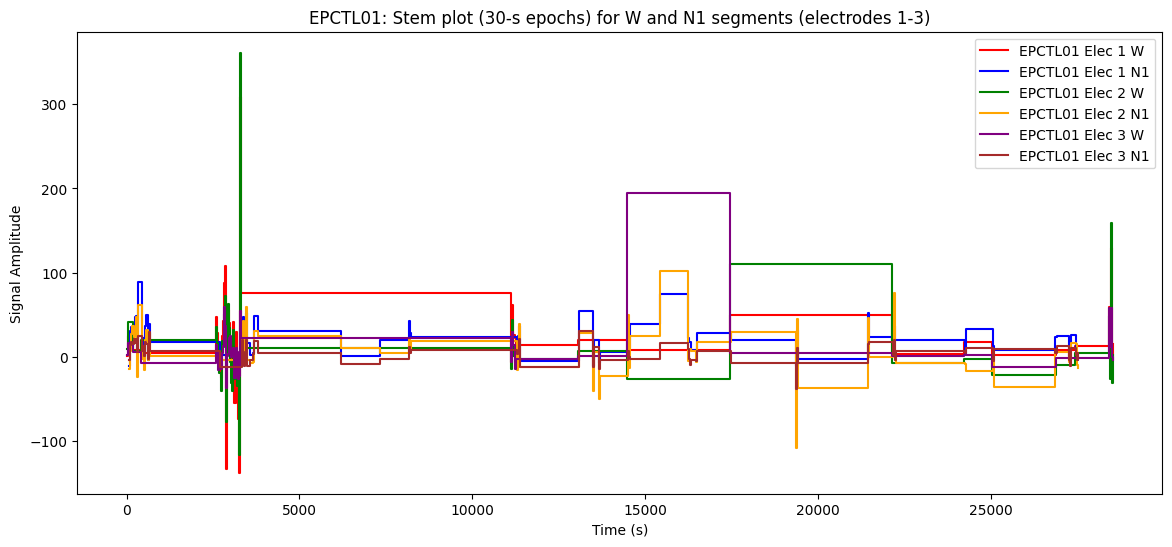

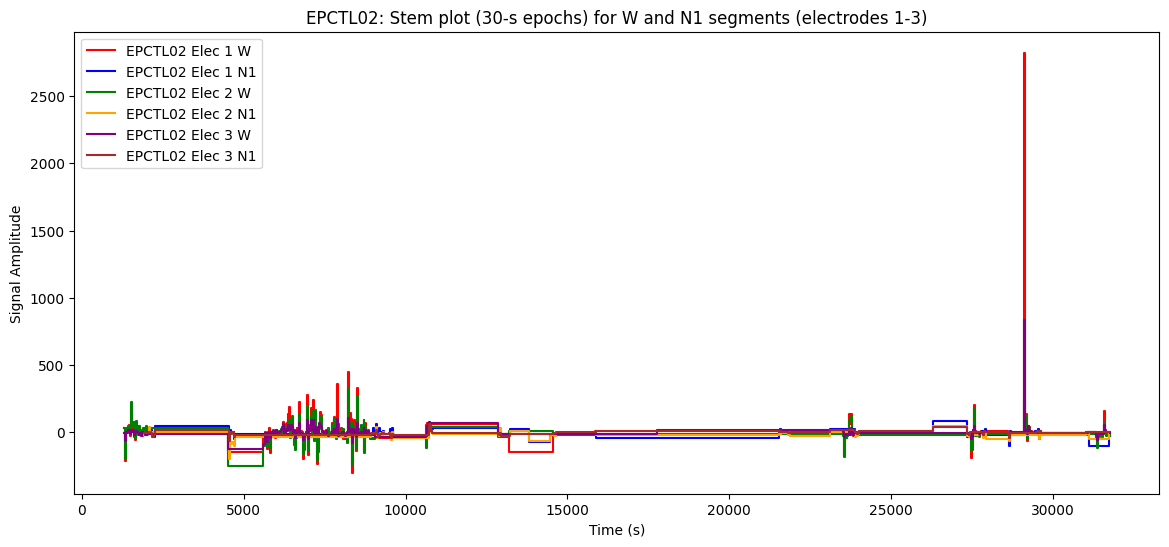

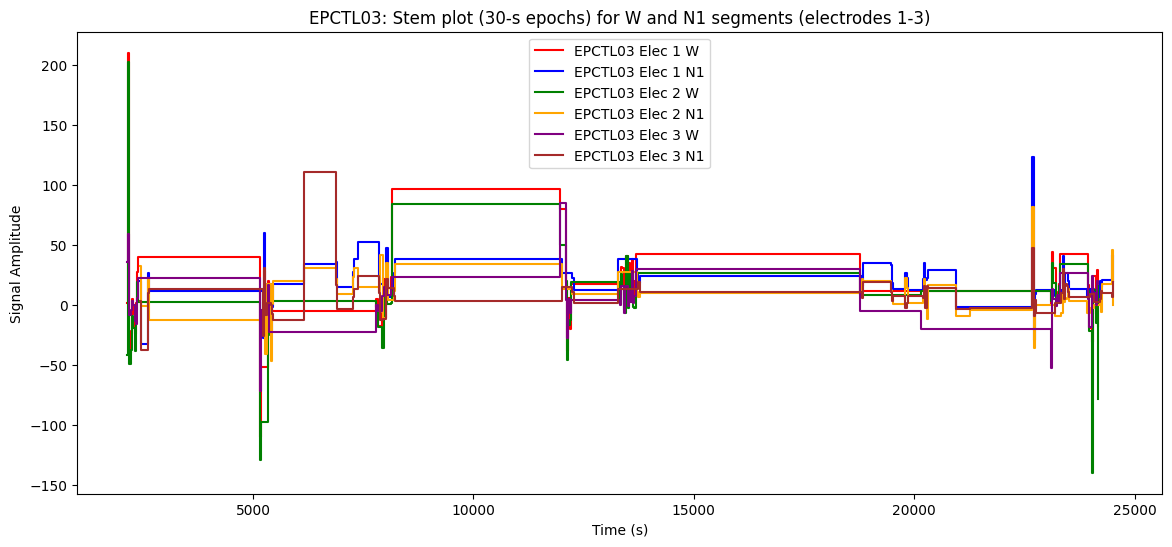

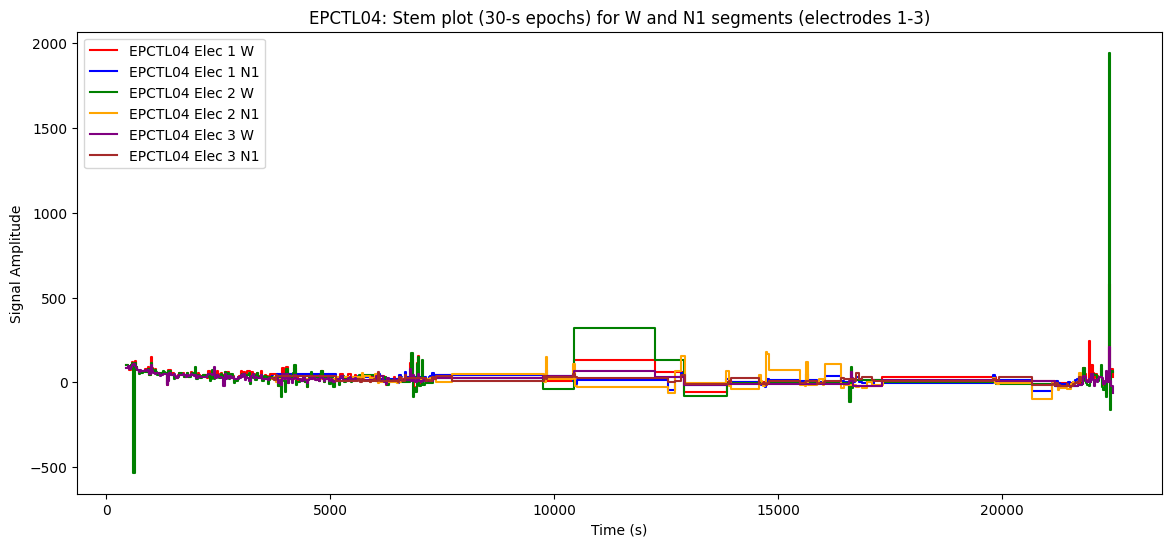

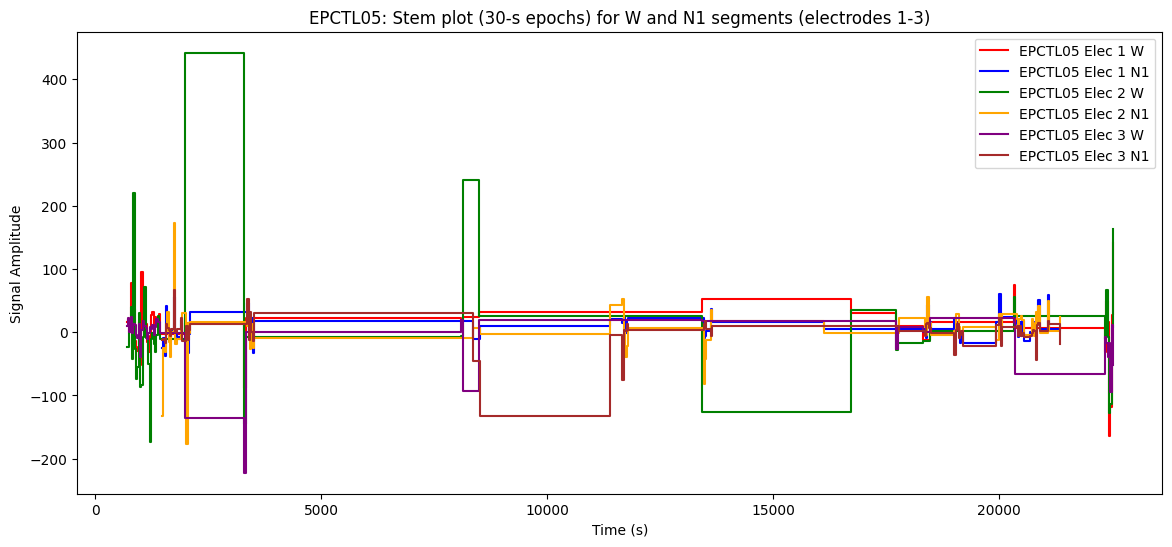

In [11]:
data_dir = "/Users/tereza/spring_2025/STAT_4830/STAT-4830-GOALZ-project/data/ANPHY-Sleep_data"
subject_dirs = sorted([d for d in os.listdir(data_dir)
                       if d.lower().startswith("epctl") and os.path.isdir(os.path.join(data_dir, d))])
color_map = {(0, "W"): "red", (0, "N1"): "blue",
             (1, "W"): "green", (1, "N1"): "orange",
             (2, "W"): "purple", (2, "N1"): "brown"}

for subject in subject_dirs[:5]:
    subject_path = os.path.join(data_dir, subject)
    csv_files = glob.glob(os.path.join(subject_path, "*.csv"))
    edf_files = glob.glob(os.path.join(subject_path, "*.edf"))
    if not csv_files or not edf_files:
        print(f"Skipping {subject}: missing CSV or EDF.")
        continue
    df = pd.read_csv(csv_files[0], index_col=0)
    df_valid = df[df["stage"].isin(["W", "N1"])]
    reader = pyedflib.EdfReader(edf_files[0])
    fs = reader.getSampleFrequency(0)
    signals = [reader.readSignal(ch) for ch in range(3)]
    reader.close()
    
    plt.figure(figsize=(14, 6))
    for i in range(3):
        for stage in ["W", "N1"]:
            times = df_valid.loc[df_valid["stage"] == stage, "time_index"].values
            idx = (times * fs).astype(int)
            decimated = signals[i][idx]
            plt.step(times, decimated, where='post', color=color_map[(i, stage)],
                     label=f'{subject} Elec {i+1} {stage}')
    plt.xlabel("Time (s)")
    plt.ylabel("Signal Amplitude")
    plt.title(f"{subject}: Stem plot (30-s epochs) for W and N1 segments (electrodes 1-3)")
    plt.legend()
    plt.show()